In [2]:
import pandas as pd 

import json
import pandas as pd 
from typing import List, Dict
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 200) 



In [3]:
gpt_4o = pd.read_excel("Error Analysis/gpt4o_error_analysis.xlsx")
gpt_4o.rename(columns={'pred_topic': 'gpt_4o_pred_topic', 'pred_subtopic': 'gpt_4o_pred_subtopic'}, inplace=True)
gpt_4o = gpt_4o[['Index', 'gpt_4o_pred_topic', 'gpt_4o_pred_subtopic']]

gpt_5 = pd.read_excel("Error Analysis/gpt_5_error_analysis.xlsx")
gpt_5.rename(columns={'pred_topic': 'gpt_5_pred_topic', 'pred_subtopic': 'gpt_5_pred_subtopic'}, inplace=True)
gpt_5 = gpt_5[['Index', 'gpt_5_pred_topic', 'gpt_5_pred_subtopic']]

clude_3_sonnet = pd.read_excel("Error Analysis/clude_3_sonnet_error_analysis.xlsx")
clude_3_sonnet.rename(columns={'pred_topic': 'clude_3_sonnet_pred_topic', 'pred_subtopic': 'clude_3_sonnet_pred_subtopic'}, inplace=True)
clude_3_sonnet = clude_3_sonnet[['Index', 'clude_3_sonnet_pred_topic', 'clude_3_sonnet_pred_subtopic']]


llama3_70b = pd.read_excel("Error Analysis/llama3_70b_error_analysis.xlsx")
llama3_70b.rename(columns={'pred_topic': 'llama3_70b_pred_topic', 'pred_subtopic': 'llama3_70b_pred_subtopic'}, inplace=True)
llama3_70b = llama3_70b[['Index', 'llama3_70b_pred_topic', 'llama3_70b_pred_subtopic']]

gemma3_27b = pd.read_excel("Error Analysis/gemma3_27b_error_analysis.xlsx")
gemma3_27b.rename(columns={'pred_topic': 'gemma3_27b_pred_topic', 'pred_subtopic': 'gemma3_27b_pred_subtopic'}, inplace=True)
gemma3_27b = gemma3_27b[['Index', 'gemma3_27b_pred_topic', 'gemma3_27b_pred_subtopic']]

llama3_Gaja_8b = pd.read_excel("Error Analysis/llama3_Gaja_8b_error_analysis.xlsx")
llama3_Gaja_8b.rename(columns={'pred_topic': 'llama3_Gaja_8b_pred_topic', 'pred_subtopic': 'llama3_Gaja_8b_pred_subtopic'}, inplace=True)
llama3_Gaja_8b = llama3_Gaja_8b[['Index', 'llama3_Gaja_8b_pred_topic', 'llama3_Gaja_8b_pred_subtopic']]

Krutrim = pd.read_excel("Error Analysis/Krutrim_error_analysis.xlsx")
Krutrim.rename(columns={'pred_topic': 'Krutrim_pred_topic', 'pred_subtopic': 'Krutrim_pred_subtopic'}, inplace=True)
Krutrim = Krutrim[['Index', 'Krutrim_pred_topic', 'Krutrim_pred_subtopic']]

Sarvam = pd.read_excel("Error Analysis/sarvam_error_analysis.xlsx")
Sarvam.rename(columns={'pred_topic': 'Sarvam_pred_topic', 'pred_subtopic': 'Sarvam_pred_subtopic'}, inplace=True)
Sarvam = Sarvam[['Index', 'Sarvam_pred_topic', 'Sarvam_pred_subtopic']]



In [5]:
gpt_5.head(2)

,Index,gpt_5_pred_topic,gpt_5_pred_subtopic
0,0,Menstrual Health,Menstrual Cycle Information
1,1,Menstrual Health,Sanitary Products and Hygiene


In [6]:
data = pd.read_excel("./data/hinglish/final_jmir_data/cleaned_data_for_jmir.xlsx")
data.head(2)

,Message ID,Index,User Content,Topic,Sub Topic
0,19676,0,kya is it normal to have irregular periods,Menstrual Health,Menstrual Cycle Information
1,19844,1,Mere private part ke aas paas jalne jaisa mehsoos ho raha hai periods ke dauraan.,Menstrual Health,Period Pain Management


In [13]:
# Compute lengths
temp = data.copy()
temp["char_length"] = temp["User Content"].str.len()
temp["word_count"] = temp["User Content"].str.split().apply(len)

# Aggregate stats
max_len = int(temp["char_length"].max())
avg_len = float(temp["char_length"].mean())

max_words = int(temp["word_count"].max())
avg_words = float(temp["word_count"].mean())
max_words, avg_words

(71, 10.579668348954579)

In [7]:
from functools import reduce

# List of DataFrames
dfs = [data, gpt_5, clude_3_sonnet, llama3_70b, gemma3_27b, llama3_Gaja_8b, Sarvam]

# Merge all on 'ID'
merged_df = reduce(lambda left, right: pd.merge(left, right, on='Index'), dfs)

In [8]:
merged_df.head()

,Message ID,Index,User Content,Topic,Sub Topic,gpt_5_pred_topic,gpt_5_pred_subtopic,clude_3_sonnet_pred_topic,clude_3_sonnet_pred_subtopic,llama3_70b_pred_topic,llama3_70b_pred_subtopic,gemma3_27b_pred_topic,gemma3_27b_pred_subtopic,llama3_Gaja_8b_pred_topic,llama3_Gaja_8b_pred_subtopic,Sarvam_pred_topic,Sarvam_pred_subtopic
0,19676,0,kya is it normal to have irregular periods,Menstrual Health,Menstrual Cycle Information,Menstrual Health,Menstrual Cycle Information,Menstrual Health,Menstrual Cycle Information,Menstrual Health,Menstrual Cycle Information,Menstrual Health,Menstrual Cycle Information,Menstrual Health,Menstrual Cycle Information,Menstrual Health,Menstrual Cycle Information
1,19844,1,Mere private part ke aas paas jalne jaisa mehsoos ho raha hai periods ke dauraan.,Menstrual Health,Period Pain Management,Menstrual Health,Sanitary Products and Hygiene,Menstrual Health,Period Pain Management,Menstrual Health,Period Pain Management,Sexual and Vaginal Health,Vaginal Health and Discharge,Menstrual Health,Menstrual Flow,Menstrual Health,Sanitary Products and Hygiene
2,19737,2,Kabhi kabhi period aage piche ho jata hai but 1-2 din hi,Menstrual Health,Menstrual Cycle Information,Menstrual Health,Menstrual Cycle Information,Menstrual Health,Menstrual Cycle Information,Menstrual Health,Menstrual Cycle Information,Menstrual Health,Menstrual Cycle Information,Menstrual Health,Menstrual Cycle Information,Menstrual Health,Menstrual Cycle Information
3,19685,3,Does masturbation lead to stop in periods?,Menstrual Health,Menstrual Cycle Information,Menstrual Health,Menstrual Cycle Information,Sexual and Vaginal Health,Sex-Related Queries,Menstrual Health,Menstrual Cycle Information,Menstrual Health,Menstrual Cycle Information,Menstrual Health,Menstrual Cycle Information,Menstrual Health,Menstrual Cycle Information
4,19744,4,I didn't not get my periods from 4 months I have PCOD,Menstrual Health,Menstrual Cycle Information,PCOS/PCOD,Symptoms,PCOS/PCOD,Symptoms,PCOS/PCOD,Symptoms,PCOS/PCOD,Symptoms,PCOS/PCOD,Symptoms,PCOS/PCOD,Symptoms


In [9]:
merged_df.isnull().sum()

Message ID                      504
Index                             0
User Content                      0
Topic                             0
Sub Topic                         0
gpt_5_pred_topic                  0
gpt_5_pred_subtopic               0
clude_3_sonnet_pred_topic         0
clude_3_sonnet_pred_subtopic      0
llama3_70b_pred_topic             0
llama3_70b_pred_subtopic          0
gemma3_27b_pred_topic             0
gemma3_27b_pred_subtopic          0
llama3_Gaja_8b_pred_topic         0
llama3_Gaja_8b_pred_subtopic      0
Sarvam_pred_topic                 0
Sarvam_pred_subtopic              0
dtype: int64

In [10]:
# result = merged_df.query("Topic == Krutrim_pred_topic and Topic != gpt_4o_pred_topic and ")
# result

In [11]:
merged_df.to_excel("Error Analysis/six_models_error_analysis_new.xlsx", index=False)

In [21]:
temp = temp[temp["Topic"] == "Menstrual Health"]

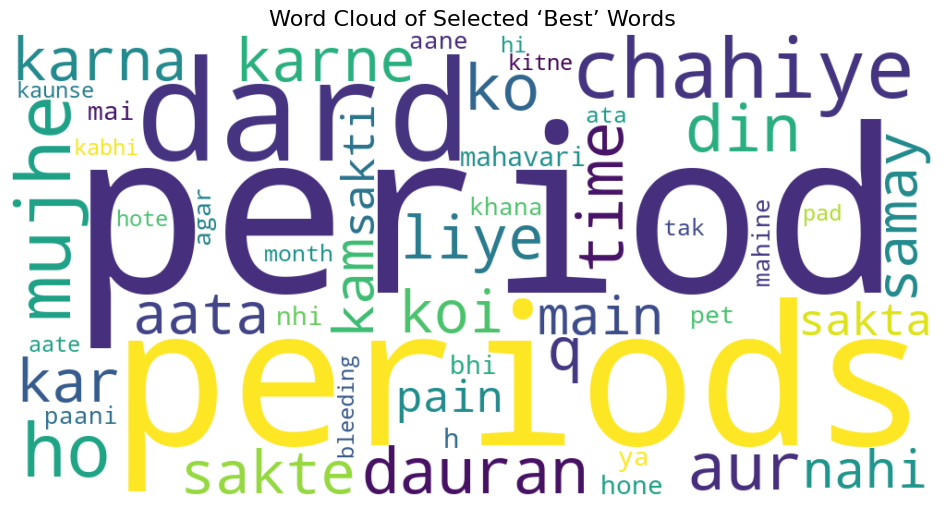

In [ ]:
import re
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# ---------------------------
# ---------------------------
data = {
    "Message ID": [19676, 19844, 19845],
    "User Content": [
        "kya is it normal to have irregular periods",
        "Mere private part me dard hai",
        "pregnancy ke dauraan vomiting hoti hai kya kare"
    ],
    "Topic": ["Menstrual Health", "Menstrual Health", "Pregnancy"],
    "Sub Topic": ["Menstrual Cycle Information", "Pain", "Vomiting"],
    "char_length": [42, 28, 51],
    "word_count": [8, 6, 9]
}
df = pd.DataFrame(data)

# ---------------------------
# 2) Config: choose “best words”
# ---------------------------
TOP_K = 50          # keep the top 50 words by frequency (set None to disable)
MIN_FREQ = 1        # or only keep words that appear at least this many times
FORCE_INCLUDE = set([])  # e.g., {"pregnancy", "periods"}
FORCE_EXCLUDE = set([])  # e.g., {"pain"}

# English + Hinglish stopwords (customize freely)
STOPWORDS = {
    # english
    "i","me","my","we","our","you","your","he","she","it","they","them",
    "a","an","the","and","or","but","if","to","of","for","in","on","with",
    "is","are","was","were","be","been","being","do","does","did","have","has","had",
    # common SRH filler / Hinglish
    "kya","hai","ke","ka","ki","me","mein","hain","hoti","hota","kare","karo",
    "ye","wo","jo","se","par","kyu","kyun","kab","kaha","kaise","normal","best"
}

# ---------------------------
# 3) Tokenize + clean
# ---------------------------
def simple_tokenize(text: str):
    # keep letters only; split on non-letters
    tokens = re.findall(r"[a-zA-Z\u0900-\u097F]+", text.lower())
    return tokens

all_text = " ".join(temp["User Content"].astype(str).tolist())
tokens = simple_tokenize(all_text)

# remove stopwords and force-exclusions; then add any force-includes later
filtered = [w for w in tokens if (w not in STOPWORDS and w not in FORCE_EXCLUDE)]

# ---------------------------
# 4) Pick the “best” words
# ---------------------------
freq = Counter(filtered)

# Always keep FORCE_INCLUDE, even if filtered earlier
for w in FORCE_INCLUDE:
    if w not in freq:
        freq[w] = 1

# Apply MIN_FREQ
if MIN_FREQ is not None and MIN_FREQ > 1:
    freq = Counter({w:c for w,c in freq.items() if c >= MIN_FREQ})

# Apply TOP_K
if TOP_K is not None:
    most_common = freq.most_common(TOP_K)
    freq = Counter(dict(most_common))

# If everything got filtered out, fall back to original tokens to avoid error
if not freq:
    freq = Counter(tokens)

# ---------------------------
# 5) Generate the word cloud
#    (Set a valid TTF font path on Windows if needed)
# ---------------------------
wc = WordCloud(
    width=1000,
    height=500,
    background_color="white",
    collocations=False,  # don’t join words into bigrams automatically
    # font_path="C:/Windows/Fonts/Arial.ttf",  # uncomment on Windows
)

# Use frequencies so we only include your selected “best” words
wc = wc.generate_from_frequencies(freq)

plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Selected ‘Best’ Words", fontsize=16)
plt.show()


In [23]:
Counter(tokens)

Counter({'hai': 734,
         'kya': 495,
         'period': 450,
         'periods': 444,
         'ke': 434,
         'hota': 226,
         'me': 201,
         'dard': 200,
         'mein': 176,
         'se': 176,
         'chahiye': 136,
         'mujhe': 115,
         'ho': 108,
         'kyu': 106,
         'hain': 104,
         'to': 90,
         'ka': 88,
         'ki': 86,
         'aur': 80,
         'din': 79,
         'dauran': 76,
         'time': 75,
         'ko': 75,
         'liye': 74,
         'karne': 73,
         'q': 71,
         'sakte': 70,
         'karna': 69,
         'kar': 68,
         'koi': 66,
         'samay': 63,
         'aata': 63,
         'kam': 59,
         'hoti': 56,
         'main': 54,
         'nahi': 52,
         'par': 49,
         'sakta': 48,
         'sakti': 48,
         'pain': 47,
         'mahavari': 47,
         'h': 47,
         'hone': 45,
         'bhi': 44,
         'nhi': 43,
         'ya': 43,
         'mai': 42,
         'pet